In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import os
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pmdarima.arima import auto_arima
from sklearn.metrics import confusion_matrix

In [2]:
curr_path = os.getcwd()
input_path = os.path.join(curr_path,'cleaned_data.xlsx')

data = pd.read_excel(
    input_path,
    engine='openpyxl',
)

In [3]:
data

,Date,SP500-EPS-Index,SP500-Price,UnemploymentRate,IndustrialProduction,HousingSales,USDollarIndex,GS10,VolumeOfTotalRetailTradeSales,IsExpanding
0,1969-08-01,100.000000,94.18,3.5,NaN,24900,NaN,6.69,1.129686,0
1,1969-09-01,100.287869,94.51,3.7,NaN,26000,NaN,7.16,1.129686,0
2,1969-10-01,99.682710,95.52,3.7,NaN,24400,NaN,7.10,1.129686,0
3,1969-11-01,99.067314,96.21,3.5,NaN,24900,NaN,7.14,-0.711920,0
4,1969-12-01,98.459021,91.11,3.5,NaN,25100,NaN,7.65,-0.711920,0
...,...,...,...,...,...,...,...,...,...,...
615,2020-11-01,1626.577454,3548.99,6.7,96.6509,350800,89.303234,0.87,NaN,0
616,2020-12-01,1603.047015,3695.31,6.7,97.3233,365300,87.330234,0.93,NaN,0
617,2021-01-01,1603.279871,3793.75,6.3,98.7911,373200,86.921252,1.08,NaN,0
618,2021-02-01,1602.994143,3883.43,6.2,94.9946,362000,87.187175,1.26,NaN,0


In [4]:
new_data = data.copy(deep = True)

### With .diff()

In [5]:
new_data = new_data.dropna(how = 'any')
new_data = shuffle(new_data)
y = new_data['IsExpanding']
X = new_data.drop(['SP500-EPS-Index', 'Date', 'IsExpanding'], axis = 1)
X = X.diff()

In [6]:
X = X.dropna(how = 'any')
X

,SP500-Price,UnemploymentRate,IndustrialProduction,HousingSales,USDollarIndex,GS10,VolumeOfTotalRetailTradeSales
83,-79.90,0.7,-10.9118,-40100.0,-24.9191,-2.54,0.768376
407,888.34,-1.6,52.1304,145600.0,-13.5446,-3.85,2.204325
295,-528.73,0.3,-27.1785,-57900.0,-2.4544,2.50,-0.734466
218,-183.61,-0.5,-8.4645,-25800.0,5.8924,3.04,-2.205315
270,132.36,1.4,2.4229,10700.0,-9.0702,-2.18,1.432272
...,...,...,...,...,...,...,...
259,268.38,0.9,10.3605,66400.0,-5.8613,-0.30,-0.293001
168,-209.88,2.7,-10.5853,-45700.0,35.3012,3.74,1.233097
56,-69.94,-4.4,-4.9097,-41100.0,-23.5357,-4.34,-1.707529
343,984.37,-0.4,42.8350,117000.0,-2.0091,-1.86,1.277588


In [7]:
y = y[1:]
y

83     1
407    1
295    1
218    1
270    1
      ..
259    0
168    1
56     1
343    0
222    1
Name: IsExpanding, Length: 543, dtype: int64

In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# logistic regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [10]:
# predicted value
y_pred = clf.predict(X_test)

In [11]:
sum(y_test != y_pred)

60

In [12]:
confusion_matrix(y_test, y_pred)

array([[24, 19],
       [41, 25]], dtype=int64)

In [13]:
# acc
1 - sum(y_test != y_pred) / len(y_pred)

0.4495412844036697

### Without .diff()

In [14]:
new_data_nd = data.copy(deep = True)
new_data_nd = new_data_nd.dropna(how = 'any')
new_data_nd = shuffle(new_data_nd)
y_nd = new_data_nd['IsExpanding']
X_nd = new_data_nd.drop(['SP500-EPS-Index', 'Date', 'IsExpanding'], axis = 1)

In [15]:
X_train_nd, X_test_nd, y_train_nd, y_test_nd = train_test_split(X_nd, y_nd, test_size=0.2)

In [16]:
clf = LogisticRegression(random_state=0).fit(X_train_nd, y_train_nd)

In [17]:
y_pred_nd = clf.predict(X_test_nd)

In [18]:
confusion_matrix(y_test_nd, y_pred_nd)

array([[ 0, 33],
       [ 0, 76]], dtype=int64)

In [19]:
# acc
1 - sum(y_test_nd != y_pred_nd) / len(y_pred_nd)

0.6972477064220184

### AUTO-ARIMA

In [20]:
y = data['SP500-EPS-Index']

In [21]:
arima_model = auto_arima(y[:600], max_p=10, max_d=4, max_q=10, seasonal = False)

In [22]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:               SARIMAX(2, 1, 5)   Log Likelihood               -2390.659
Date:                Tue, 12 Oct 2021   AIC                           4799.317
Time:                        23:27:00   BIC                           4838.875
Sample:                             0   HQIC                          4814.718
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4071      0.546      0.745      0.456      -0.664       1.478
ar.L1          1.6271      0.027     59.808      0.000       1.574       1.680
ar.L2         -0.7959      0.025    -31.592      0.000      -0.845      -0.747
ma.L1         -0.7481      0.045    -16.688      0.000      -0.836      -0.660
ma.L2          0.0824      0.040      2.078      0.038       0.005       0.160
ma.L3         -0.1980      0.019    -10.357      0.000      -0.236      -0.161
ma.L4          0.4585      0.024     18.909      0.000       0.411       0.506
ma.L5          0.1627      0.032      5.158      0.000       0.101       0.225
sigma2       171.2359      1.850     92.548      0.000     167.609     174.862
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):            190795.20
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):             358.98   Skew:                             1.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        90.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
eps_pred = arima_model.predict(n_periods = 20)

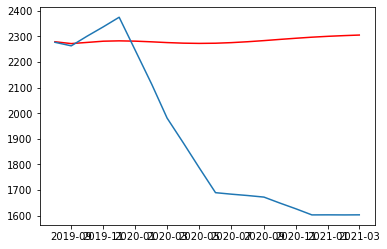

In [24]:
plt.plot(data['Date'][600:],eps_pred, color = 'red')  # predicted value
plt.plot(data['Date'][600:], y[600:])                 # true value